In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [31]:
flowlines = gpd.read_file('../data/flowlines_all.geojson')

cat = ['StreamOrde', 'StartFlag', 'TerminalFl', 'huc4']
num = ['AreaSqKM', 'LENGTHKM', 'ArbolateSu', 'SLOPE', 'MAXELEVSMO', 
       'MINELEVSMO', 'QA_MA', 'VA_MA', 'QA_01', 'VA_01']

## Data Cleaning

In [5]:
flowlines = flowlines.replace(to_replace=[-9999.00, -9998.00], value=np.nan)

for col in ['QA_MA', 'VA_MA', 'QA_01', 'VA_01']:
    flowlines[col] = flowlines[col].replace(to_replace=0.00, value=np.nan)

for col in ['AreaSqKM', 'LENGTHKM', 'ArbolateSu','MAXELEVSMO', 'MINELEVSMO']:
    flowlines[col] = flowlines[col].replace(to_replace=0.00, value=np.nan)

# if slope is greater than 1, set to NaN
flowlines['SLOPE'].where(flowlines['SLOPE'] < 1.00, np.nan, inplace=True)

# if stream order is < 1, set to NaN
flowlines['StreamOrde'].where(flowlines['StreamOrde'] > 0, np.nan, inplace=True)

# convert units
flowlines['MAXELEVSMO'] = flowlines['MAXELEVSMO'] / 100 # cm to m
flowlines['MINELEVSMO'] = flowlines['MINELEVSMO'] / 100 # cm to m
flowlines

,COMID,StreamOrde,StartFlag,TerminalFl,AreaSqKM,LENGTHKM,ArbolateSu,SLOPE,MAXELEVSMO,MINELEVSMO,QA_MA,VA_MA,QA_01,VA_01,huc4,geometry
0,19772077,2.0,0,0,0.1269,0.475,565.812,0.002926,0.9369,0.9230,0.096,0.63744,0.216,0.81453,1806,"LINESTRING (-120.11581 37.16139, -120.11735 37..."
1,19772079,4.0,0,0,0.2376,1.036,557.847,0.001364,0.9351,0.9230,0.004,0.45006,0.009,0.52630,1806,"LINESTRING (-120.11238 37.16407, -120.11281 37..."
2,19772139,1.0,1,0,8.4627,7.276,7.276,0.008793,1.6520,1.0255,0.153,0.74385,0.359,0.99330,1806,"LINESTRING (-120.01840 37.17531, -120.01866 37..."
3,19772159,2.0,0,0,0.6291,1.606,11.969,0.002696,1.0255,0.9822,0.234,0.70639,0.541,0.92948,1806,"LINESTRING (-120.04124 37.13242, -120.04070 37..."
4,19772169,3.0,0,0,1.6839,1.354,38.094,0.001411,0.9822,0.9631,0.725,0.77303,1.728,1.04530,1806,"LINESTRING (-120.04728 37.12531, -120.04739 37..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163709,8236560,1.0,0,0,0.2583,0.575,1.380,0.300452,16.9131,15.1855,1.199,0.94602,1.805,1.10072,1801,"LINESTRING (-123.00114 40.21813, -123.00071 40..."
163710,8235184,1.0,0,0,0.1782,0.616,0.805,0.330763,18.9506,16.9131,0.862,0.90435,1.176,1.01122,1801,"LINESTRING (-123.00352 40.21324, -123.00343 40..."
163711,8235174,1.0,0,0,0.9630,1.233,2.613,0.245109,15.1855,12.1633,2.412,1.04157,4.188,1.29116,1801,"LINESTRING (-123.00114 40.22273, -123.00157 40..."
163712,8236334,1.0,1,0,0.3852,0.189,0.188,0.000010,18.9506,18.9506,0.595,NaN,0.804,NaN,1801,"LINESTRING (-123.00487 40.21189, -123.00352 40..."


## Data Exploration

### Missing

In [8]:
(flowlines.isna().sum() / len(flowlines) * 100).round(2)

COMID         0.00
StreamOrde    1.22
StartFlag     0.00
TerminalFl    0.00
AreaSqKM      1.41
LENGTHKM      0.00
ArbolateSu    1.22
SLOPE         1.75
MAXELEVSMO    1.70
MINELEVSMO    1.77
QA_MA         1.66
VA_MA         7.21
QA_01         1.82
VA_01         7.21
huc4          0.00
geometry      0.00
dtype: float64

## SubRegions Map

In [20]:
subregions = gpd.read_file('../data/subregions.geojson')
subregions

,OBJECTID,tnmid,metasourceid,sourcedatadesc,sourceoriginator,sourcefeatureid,loaddate,areaacres,areasqkm,states,huc4,name,shape_Length,shape_Area,referencegnis_ids,geometry
0,4,{0E918E79-0C68-4381-920B-3A08077F4ED3},{31AC21ED-1551-431B-963A-63D44B9887E8},None,U.S. Geological Survey,None,1641154835000,8472484.56,34286.96,CA,1806,Central California Coastal,1.969125e+06,5.197255e+10,None,"MULTIPOLYGON (((-122.11789 37.25463, -122.1183..."
1,5,{7E32DC94-E57D-4114-A4FA-8F91DCC89CC6},{93C374CC-EFFC-4F80-B73B-B02CB768ABCE},None,U.S. Geological Survey,None,1641219580000,8861368.04,35860.72,"CA,MX",1807,Southern California Coastal,2.174500e+06,5.186619e+10,None,"MULTIPOLYGON (((-119.10907 34.82365, -119.1093..."
2,6,{0D615870-DB12-485F-B551-125131FD9A46},None,None,None,None,1606900931000,18105223.06,73269.30,"CA,NV",1809,Northern Mojave-Mono Lake,2.930744e+06,1.121971e+11,None,"POLYGON ((-118.75945 38.32087, -118.75959 38.3..."
3,7,{8B9A6D8B-2257-402E-99C7-B88C5C95D776},{1FF46025-874C-4D4B-BD40-702A6B62DC21},None,U.S. Geological Survey,None,1647429883000,3437208.65,13909.90,CA,1805,San Francisco Bay,1.191326e+06,2.230339e+10,None,"MULTIPOLYGON (((-123.01419 37.94334, -123.0136..."
4,8,{64CCE751-2B6B-4196-A5B0-BEA80211D1AC},{93C374CC-EFFC-4F80-B73B-B02CB768ABCE},None,U.S. Geological Survey,None,1641219579000,10934157.74,44249.01,"CA,MX",1810,Southern Mojave-Salton Sea,1.938340e+06,6.418421e+10,None,"POLYGON ((-115.33798 35.26292, -115.33821 35.2..."
5,9,{DF00BF56-50CB-40DB-BBC6-DA6E52245DC1},{B9A0B744-98EC-42A3-8BF3-4F211A797F1E},None,U.S. Geological Survey,None,1641290908000,17794824.30,72013.16,"CA,OR",1802,Sacramento,2.993672e+06,1.230115e+11,None,"POLYGON ((-120.45820 42.43186, -120.45878 42.4..."
6,10,{63D04835-914F-4DE2-A52A-DC9414F3091D},{B9A0B744-98EC-42A3-8BF3-4F211A797F1E},None,U.S. Geological Survey,None,1641290908000,2913621.10,11791.02,"CA,NV",1808,North Lahontan,1.441143e+06,2.051798e+10,None,"POLYGON ((-120.18352 41.97436, -120.18398 41.9..."
7,87,{419D90DC-A7AA-4C8F-8269-2C3F59883D1F},{A0039473-A809-4129-8E12-32F32F5B835C},None,U.S. Geological Survey,None,1641219159000,10127904.92,40986.21,CA,1804,San Joaquin,1.643854e+06,6.553432e+10,None,"POLYGON ((-120.54011 38.75127, -120.54153 38.7..."
8,88,{91CB7D75-4CD6-4EC4-ACB5-8524A6DFB363},{31AC21ED-1551-431B-963A-63D44B9887E8},None,U.S. Geological Survey,None,1641154835000,10501344.46,42497.47,CA,1803,Tulare-Buena Vista Lakes,1.427577e+06,6.515506e+10,None,"POLYGON ((-118.90462 37.20802, -118.90541 37.2..."
9,192,{4A7807FE-7B9A-492A-AA96-460EE7B539F0},{1FF46025-874C-4D4B-BD40-702A6B62DC21},None,U.S. Geological Survey,None,1647429883000,16744234.15,67761.57,"CA,OR",1801,Klamath-Northern California Coastal,3.121428e+06,1.194310e+11,None,"POLYGON ((-121.63691 43.34029, -121.63660 43.3..."


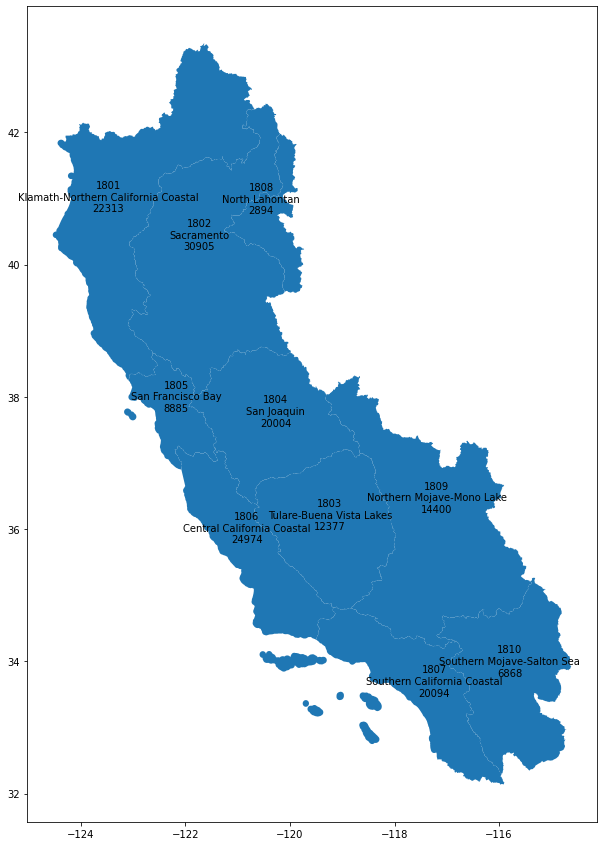

In [27]:
subregions.plot(figsize=(15,15))
subregions['coords'] = subregions['geometry'].apply(lambda x: x.representative_point().coords[:])
subregions['coords'] = [coords[0] for coords in subregions['coords']]
subregions['label'] = subregions['huc4'] + '\n' + subregions['name']
for idx, row in subregions.iterrows():
    count = (flowlines['huc4'] == row['huc4']).sum()
    label = row['label'] + '\n' + str(count)
    plt.annotate(text=label, xy=row['coords'], horizontalalignment='center')

### Categorical Variables ~ Stream Order, Start, Terminal, Hydrologic Unit Code

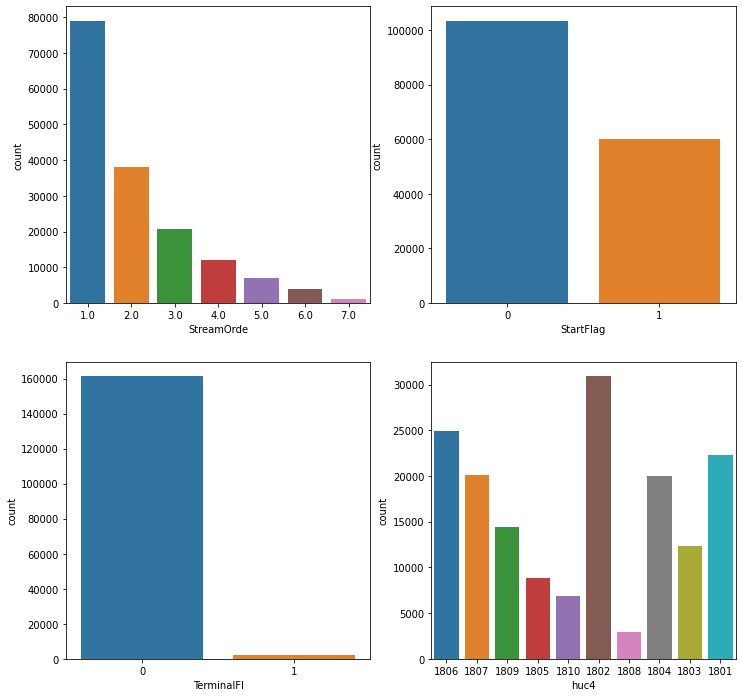

In [28]:
# global plots
fig, ax = plt.subplots(2,2, figsize=(12, 12))
for i,col in enumerate(flowlines[cat]):
    if i < 2:
        ca = ax[0,i]
    else:
        ca = ax[1,i-2]
    sns.countplot(x=col, data=flowlines, ax=ca)

## Numerical Variables

In [42]:
# catchment area 
flowlines['AreaSqKM'].sort_values(ascending=False).head(30)

# catchment Area X length scatter plot

38937     3072.0123
139613    2065.4865
20238     2065.4865
73137     1328.0832
20256     1277.0271
139631    1277.0271
139621    1123.7508
20246     1123.7508
68732      880.6041
137257     713.7315
19584      713.7315
156137     532.4958
44930      470.0610
73088      470.0610
80472      467.4879
45484      457.7913
78854      454.3317
19594      454.0185
137267     454.0185
74982      440.2260
139577     420.0471
20202      420.0471
68705      402.4746
18293      375.8112
134141     375.8112
107030     372.7359
156264     363.5271
68395      359.5545
108911     339.4719
137250     326.9790
Name: AreaSqKM, dtype: float64

In [ ]:
# stream length
# arbolate sum
# slope, max elevation, min elevation
# discharge, velocity